In [24]:
import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [25]:
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [26]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 옵티마이저 : 손실값으로 가중치와 절편을 조정, 다시 학습(배치 단위) : 역전파(Back Propagation)

- 기본 경사하강법 옵티마이저
    - SGD
        - 모멘텀 최적화
        - 네스테로프 경사 가속

- 적응적 학습률 경사하강법 옵티마이저
    - AdaGrad
    - RMSprop

- 적응적 학습률 + 모멘텀 최적화
    - Adam

- learning_rate 기본값 : 0.1

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7654 - loss: 0.6731
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8556 - loss: 0.4070
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3570
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.3301
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8873 - loss: 0.3114


In [30]:
history.history

{'accuracy': [0.8155624866485596,
  0.8584791421890259,
  0.8708541393280029,
  0.879729151725769,
  0.8865208625793457],
 'loss': [0.5252137780189514,
  0.3971133232116699,
  0.3542526066303253,
  0.3295777142047882,
  0.3120335340499878]}

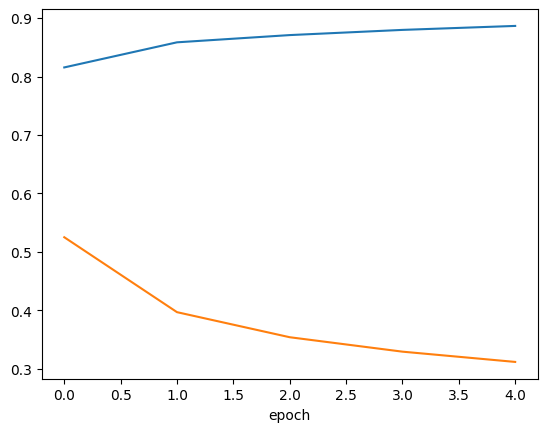

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.show()

In [33]:
# Adam 옵티마이저 적용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

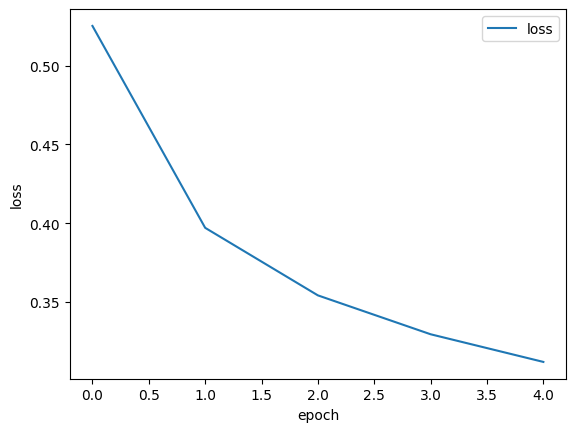

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
# Flatten() 층 : 다차원 배열 입력 -> 1차원 배열 입력 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
# Adam 옵티마이저 적용
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# learning_rate 설정 
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6449 - loss: 1.0916
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8277 - loss: 0.5223
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8436 - loss: 0.4679
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4320
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.4131


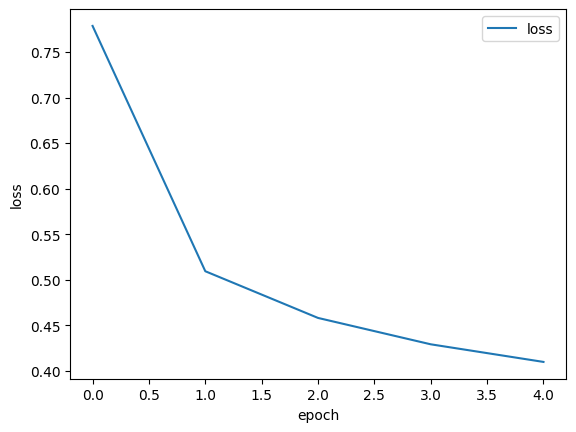

In [39]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()